In [48]:
import numpy as np
import pandas as pd
import random
import itertools
from keras.utils import to_categorical


#파일경로에 한글명이 있으면 안된다
name_to_seq = pd.read_csv('D:\AI_data_set\Patch\One_Pad_filename_label.csv', header = None, squeeze = True)

train_X = []
test_X = []

train_Y = []
test_Y = []


for i in range(0,60):
    for k in range(0,20):
        filepath = 'D:\AI_data_set\Patch\One_Pad_Model&Data\One_Pad_1N_csv\One_Pad_1N_'+ str(name_to_seq[i]) + '_' + str(k+1) + '.csv'
        df = np.array(pd.read_csv(filepath, header = None))
        Y_press = df[:,2]
        Y_category = np.repeat(i, 800)
        Y_temp = np.stack((Y_press, Y_category), axis = 1)
    
        X_temp = df[:,3:33]
    
        train_X.append(X_temp)
        train_Y.append(Y_temp)

for k in range(20,22):
        filepath = 'D:\AI_data_set\Patch\One_Pad_Model&Data\One_Pad_1N_csv\One_Pad_1N_'+ str(name_to_seq[i]) + '_' + str(k+1) + '.csv'
        df = np.array(pd.read_csv(filepath, header = None))
        Y_press = df[:,2]
        Y_category = np.repeat(i, 800)
        Y_temp = np.stack((Y_press, Y_category), axis = 1)
        X_temp = df[:,3:33]
        
        test_X.append(X_temp)
        test_Y.append(Y_temp)
        
train_X = np.array(train_X)
test_X = np.array(test_X)
train_Y = np.array(train_Y)
test_Y = np.array(test_Y)


print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

test_Y = test_Y.reshape(-1, test_Y.shape[-1])
train_Y = train_Y.reshape(-1, train_Y.shape[-1])

test_X = test_X.reshape(-1, test_X.shape[-1])
train_X = train_X.reshape(-1, train_X.shape[-1])

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

test_press_Y = test_Y[:,0]
train_press_Y = train_Y[:,0]
test_cate_Y = test_Y[:,1]
train_cate_Y = train_Y[:,1]

test_cate_Y = to_categorical(test_cate_Y,60)
train_cate_Y = to_categorical(train_cate_Y,60)
train_press_Y = np.expand_dims(train_press_Y,1)
test_press_Y = np.expand_dims(test_press_Y,1)

print(test_cate_Y)

rand_train = np.arange(len(train_Y))
np.random.shuffle(rand_train)
r_train_X = train_X[rand_train]
r_train_press_Y = train_press_Y[rand_train]
r_train_cate_Y = train_cate_Y[rand_train]

(1200, 800, 30)
(1200, 800, 2)
(2, 800, 30)
(2, 800, 2)
(960000, 30)
(960000, 2)
(1600, 30)
(1600, 2)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [68]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Merge, Concatenate
from keras.layers import Dropout, Activation, LeakyReLU, PReLU, ELU, ThresholdedReLU
from keras.layers import Conv1D, Conv2D, MaxPooling2D, AveragePooling1D, AveragePooling2D
from keras.layers import Input, Dense, TimeDistributed, GRU
from keras.layers.normalization import BatchNormalization
from keras.layers import LSTM, Reshape
from keras.layers import ZeroPadding2D, Conv2DTranspose, UpSampling2D
from keras.utils  import to_categorical
import keras.callbacks


In [69]:
def press_model_set():
    
    x_input = Input(shape=(30,))
    
    x = Dense(4500, kernel_initializer = 'glorot_normal', activation='relu')(x_input)
    x = Dropout(0.3)(x)
    
    x = Dense(1500, kernel_initializer = 'glorot_normal', activation='relu')(x)
    x = Dropout(0.3)(x)
    
    x = Dense(150, kernel_initializer = 'glorot_normal', activation='relu')(x)
    x = Dropout(0.3)(x)
    
    output =  Dense(1, kernel_initializer = 'glorot_normal', activation='linear')(x)    
    
    # Model set and compile
    final_model = Model(inputs = x_input, outputs = output)
    
    final_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    return final_model
    
    
press_model = press_model_set()
press_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 4500)              139500    
_________________________________________________________________
dropout_25 (Dropout)         (None, 4500)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 1500)              6751500   
_________________________________________________________________
dropout_26 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 150)               225150    
_________________________________________________________________
dropout_27 (Dropout)         (None, 150)               0         
__________

9.412265337257358 0.051597371955152335
[0.03821206]
[[1.         0.98368675]
 [0.98368675 1.        ]]


<function matplotlib.pyplot.show>

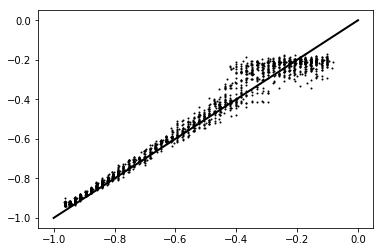

In [70]:
#%% test naive model 
%matplotlib inline
filepath='D:/AI_data_set/Patch/One_Pad_Model&Data/180118_press_One_Pad.out'

press_model.load_weights(filepath)
predicted = press_model.predict(test_X)

import matplotlib.pyplot as plt
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print(rmse(predicted, test_press_Y) / abs(np.mean(test_press_Y)) *100,rmse(predicted, test_press_Y))
print(sum(abs(predicted- test_press_Y))/(len(test_press_Y)))
print(np.corrcoef(np.squeeze(test_press_Y), np.squeeze(predicted)))

plt.plot([-1, 0], [-1,0], color='black', linestyle='-', linewidth=2)
plt.scatter(test_press_Y,predicted,s=1,color='black')

plt.show

In [71]:
def press_cate_model_set():
    
    x_input = Input(shape=(30,))
    
    x = Dense(4500, kernel_initializer = 'glorot_normal', activation='relu')(x_input)
    x = Dropout(0.3)(x)
    
    x = Dense(1500, kernel_initializer = 'glorot_normal', activation='relu')(x)
    x = Dropout(0.3)(x)
    
    x = Dense(300, kernel_initializer = 'glorot_normal', activation='relu')(x)
    x = Dropout(0.3)(x)
    
    output =  Dense(3, kernel_initializer = 'glorot_normal', activation='softmax')(x)    
    
    # Model set and compile
    final_model = Model(inputs = x_input, outputs = output)
    
    final_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
    
    return final_model
    
    
press_cate_model = press_cate_model_set()
press_cate_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 30)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 4500)              139500    
_________________________________________________________________
dropout_28 (Dropout)         (None, 4500)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 1500)              6751500   
_________________________________________________________________
dropout_29 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 300)               450300    
_________________________________________________________________
dropout_30 (Dropout)         (None, 300)               0         
__________

In [72]:
cut_list =[-1,-0.78,-0.53,0]

df = pd.DataFrame(train_press_Y)
train_press_cate_Y = df.apply(lambda x : pd.cut(x, cut_list,labels=[2,1,0]))

df = pd.DataFrame(test_press_Y)
test_press_cate_Y = df.apply(lambda x : pd.cut(x, cut_list,labels=[2,1,0]))

print(np.sum(train_press_cate_Y == 0) + np.sum(test_press_cate_Y == 0))
print(np.sum(train_press_cate_Y == 1) + np.sum(test_press_cate_Y == 1))
print(np.sum(train_press_cate_Y == 2) + np.sum(test_press_cate_Y == 2))


test_press_cate_Y = to_categorical(test_press_cate_Y,3)
train_press_cate_Y = to_categorical(train_press_cate_Y,3)

0    494160
dtype: int64
0    239160
dtype: int64
0    228280
dtype: int64


In [73]:
rand_train = np.arange(len(train_Y))
np.random.shuffle(rand_train)
r_train_X = train_X[rand_train]

r_train_press_cate_Y = train_press_cate_Y[rand_train]

In [74]:
%matplotlib inline

filepath='D:/AI_data_set/Patch/One_Pad_Model&Data/180117_One_Pad_press_cate_model_522.out'

press_cate_model.load_weights(filepath)
score, acc =  press_cate_model.evaluate(test_X, test_press_cate_Y)

print('Test score:', score)
print('Test accuracy:', acc)

#==============================================================================
#Test score: 0.131301972057
#Test accuracy: 0.94528125
#==============================================================================

score, acc =  press_cate_model.evaluate(train_X, train_press_cate_Y)

print('Test score:', score)
print('Test accuracy:', acc)

1600/1600 [==============================] - 0s 122us/step
Test score: 0.09625198048472981
Test accuracy: 0.961875
960000/960000 [==============================] - 81s 85us/step
Test score: 0.10379134243722372
Test accuracy: 0.9557760416666666


In [56]:
cut_list =[-1,-0.8,-0.6,0]

df = pd.DataFrame(train_press_Y)
train_press_cate_Y = df.apply(lambda x : pd.cut(x, cut_list,labels=[2,1,0]))

df = pd.DataFrame(test_press_Y)
test_press_cate_Y = df.apply(lambda x : pd.cut(x, cut_list,labels=[2,1,0]))

print(np.sum(train_press_cate_Y == 0) + np.sum(test_press_cate_Y == 0))
print(np.sum(train_press_cate_Y == 1) + np.sum(test_press_cate_Y == 1))
print(np.sum(train_press_cate_Y == 2) + np.sum(test_press_cate_Y == 2))


test_press_cate_Y = to_categorical(test_press_cate_Y,3)
train_press_cate_Y = to_categorical(train_press_cate_Y,3)

0    554743
dtype: int64
0    206567
dtype: int64
0    200290
dtype: int64


In [57]:
rand_train = np.arange(len(train_Y))
np.random.shuffle(rand_train)
r_train_X = train_X[rand_train]

r_train_press_cate_Y = train_press_cate_Y[rand_train]

In [58]:
filepath='D:/AI_data_set/Patch/One_Pad_Model&Data/180117_One_Pad_press_cate_model_622.out'

press_cate_model.load_weights(filepath)
score, acc =  press_cate_model.evaluate(test_X, test_press_cate_Y)

print('Test score:', score)
print('Test accuracy:', acc)

#==============================================================================
# Test score: 0.125556136504
# Test accuracy: 0.949541666667
#==============================================================================

score, acc =  press_cate_model.evaluate(train_X, train_press_cate_Y)

print('Test score:', score)
print('Test accuracy:', acc)

1600/1600 [==============================] - 0s 85us/step
Test score: 0.08720891150916714
Test accuracy: 0.968125
960000/960000 [==============================] - 84s 87us/step
Test score: 0.08777402638906084
Test accuracy: 0.9620833333333333


In [59]:
cut_list =[-1,-0.8,-0.6,0]

df = pd.DataFrame(train_press_Y)
train_press_cate_Y = df.apply(lambda x : pd.cut(x, cut_list,labels=[2,1,0]))

df = pd.DataFrame(test_press_Y)
test_press_cate_Y = df.apply(lambda x : pd.cut(x, cut_list,labels=[2,1,0]))

group0_test_index = np.where(test_press_cate_Y==0)[0]
group1_test_index = np.where(test_press_cate_Y==1)[0]
group2_test_index = np.where(test_press_cate_Y==2)[0]

group0_train_index = np.where(train_press_cate_Y==0)[0]
group1_train_index = np.where(train_press_cate_Y==1)[0]
group2_train_index = np.where(train_press_cate_Y==2)[0]

group0_test_press_Y = test_press_Y[group0_test_index]
group0_test_cate_Y = test_cate_Y[group0_test_index]
group0_test_X = test_X[group0_test_index]

group1_test_press_Y = test_press_Y[group1_test_index]
group1_test_cate_Y = test_cate_Y[group1_test_index]
group1_test_X = test_X[group1_test_index]

group2_test_press_Y = test_press_Y[group2_test_index]
group2_test_cate_Y = test_cate_Y[group2_test_index]
group2_test_X = test_X[group2_test_index]


group0_train_press_Y = train_press_Y[group0_train_index]
group0_train_cate_Y = train_cate_Y[group0_train_index]
group0_train_X = train_X[group0_train_index]

group1_train_press_Y = train_press_Y[group1_train_index]
group1_train_cate_Y = train_cate_Y[group1_train_index]
group1_train_X = train_X[group1_train_index]

group2_train_press_Y = train_press_Y[group2_train_index]
group2_train_cate_Y = train_cate_Y[group2_train_index]
group2_train_X = train_X[group2_train_index]

In [60]:
def cate_model_set():
    
    x_input = Input(shape=(30,))
    
    x = Dense(4500, kernel_initializer = 'glorot_normal', activation='relu')(x_input)
    x = Dropout(0.3)(x)
    
    x = Dense(1500, kernel_initializer = 'glorot_normal', activation='relu')(x)
    x = Dropout(0.3)(x)
    
    x = Dense(300, kernel_initializer = 'glorot_normal', activation='relu')(x)
    x = Dropout(0.3)(x)
    
    output =  Dense(60, kernel_initializer = 'glorot_normal', activation='softmax')(x)    
    
    # Model set and compile
    final_model = Model(inputs = x_input, outputs = output)
    
    final_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
    
    return final_model
    
    
cate_model = cate_model_set()
cate_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 4500)              139500    
_________________________________________________________________
dropout_22 (Dropout)         (None, 4500)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 1500)              6751500   
_________________________________________________________________
dropout_23 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 300)               450300    
_________________________________________________________________
dropout_24 (Dropout)         (None, 300)               0         
__________

In [61]:
filepath='D:/AI_data_set/Patch/One_Pad_Model&Data/180118_One_Pad_cate.out'

cate_model.load_weights(filepath)

score, acc =  cate_model.evaluate(test_X, test_cate_Y)

print('All Test score:', score)
print('All Test accuracy:', acc)

score, acc =  cate_model.evaluate(group0_test_X, group0_test_cate_Y)

print('Group 0 Test score:', score)
print('Group 0 Test accuracy:', acc)

score, acc =  cate_model.evaluate(group1_test_X, group1_test_cate_Y)

print('Group 1 Test score:', score)
print('Group 1 Test accuracy:', acc)

score, acc =  cate_model.evaluate(group2_test_X, group2_test_cate_Y)

print('Group 2 Test score:', score)
print('Group 2 Test accuracy:', acc)

score, acc =  cate_model.evaluate(train_X, train_cate_Y)

print('All Train score:', score)
print('All Train accuracy:', acc)

score, acc =  cate_model.evaluate(group0_train_X, group0_train_cate_Y)

print('Group 0 Train score:', score)
print('Group 0 Train accuracy:', acc)

score, acc =  cate_model.evaluate(group1_train_X, group1_train_cate_Y)

print('Group 1 Train score:', score)
print('Group 1 Train accuracy:', acc)

score, acc =  cate_model.evaluate(group2_train_X, group2_train_cate_Y)

print('Group 2 Train score:', score)
print('Group 2 Train accuracy:', acc)

1600/1600 [==============================] - 0s 114us/step
All Test score: 1.3906855286216382
All Test accuracy: 0.67625
885/885 [==============================] - 0s 90us/step
Group 0 Test score: 2.5142298403222347
Group 0 Test accuracy: 0.41468926701842057
275/275 [==============================] - 0s 120us/step
Group 1 Test score: 1.2401547080519941e-05
Group 1 Test accuracy: 1.0
440/440 [==============================] - 0s 91us/step
Group 2 Test score: 1.1920930376163597e-07
Group 2 Test accuracy: 1.0
960000/960000 [==============================] - 81s 85us/step
All Train score: 1.1520497521030348
All Train accuracy: 0.703534375
553858/553858 [==============================] - 47s 85us/step
Group 0 Train score: 1.9916429498849613
Group 0 Train accuracy: 0.4879680351281375
206292/206292 [==============================] - 17s 84us/step
Group 1 Train score: 0.01374818784177084
Group 1 Train accuracy: 0.9951476547806023
199850/199850 [==============================] - 17s 84us/step
G

In [62]:
%matplotlib inline

import matplotlib.pyplot as plt
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

filepath='D:/AI_data_set/Patch/One_Pad_Model&Data/180118_press_One_Pad.out'
press_model.load_weights(filepath)

predicted = press_model.predict(test_X)
true_label = test_press_Y

print("All Test")
print(rmse(predicted, true_label) / abs(np.mean(true_label)) *100,rmse(predicted, true_label))
print(sum(abs(predicted- true_label))/(len(true_label)))
print(np.corrcoef(np.squeeze(true_label), np.squeeze(predicted)))

predicted = press_model.predict(group0_test_X)
true_label = group0_test_press_Y

print("Group 0 Test")
print(rmse(predicted, true_label) / abs(np.mean(true_label)) *100,rmse(predicted, true_label))
print(sum(abs(predicted- true_label))/(len(true_label)))
print(np.corrcoef(np.squeeze(true_label), np.squeeze(predicted)))

predicted = press_model.predict(group1_test_X)
true_label = group1_test_press_Y

print("Group 1 Test")
print(rmse(predicted, true_label) / abs(np.mean(true_label)) *100,rmse(predicted, true_label))
print(sum(abs(predicted- true_label))/(len(true_label)))
print(np.corrcoef(np.squeeze(true_label), np.squeeze(predicted)))

predicted = press_model.predict(group2_test_X)
true_label = group2_test_press_Y

print("Group 2 Test")
print(rmse(predicted, true_label) / abs(np.mean(true_label)) *100,rmse(predicted, true_label))
print(sum(abs(predicted- true_label))/(len(true_label)))
print(np.corrcoef(np.squeeze(true_label), np.squeeze(predicted)))

#################################################################################################

predicted = press_model.predict(train_X)
true_label = train_press_Y

print("All Train")
print(rmse(predicted, true_label) / abs(np.mean(true_label)) *100,rmse(predicted, true_label))
print(sum(abs(predicted- true_label))/(len(true_label)))
print(np.corrcoef(np.squeeze(true_label), np.squeeze(predicted)))

predicted = press_model.predict(group0_train_X)
true_label = group0_train_press_Y

print("Group 0 Train")
print(rmse(predicted, true_label) / abs(np.mean(true_label)) *100,rmse(predicted, true_label))
print(sum(abs(predicted- true_label))/(len(true_label)))
print(np.corrcoef(np.squeeze(true_label), np.squeeze(predicted)))

predicted = press_model.predict(group1_train_X)
true_label = group1_train_press_Y

print("Group 1 Train")
print(rmse(predicted, true_label) / abs(np.mean(true_label)) *100,rmse(predicted, true_label))
print(sum(abs(predicted- true_label))/(len(true_label)))
print(np.corrcoef(np.squeeze(true_label), np.squeeze(predicted)))

predicted = press_model.predict(group2_train_X)
true_label = group2_train_press_Y

print("Group 2 Train")
print(rmse(predicted, true_label) / abs(np.mean(true_label)) *100,rmse(predicted, true_label))
print(sum(abs(predicted- true_label))/(len(true_label)))
print(np.corrcoef(np.squeeze(true_label), np.squeeze(predicted)))

All Test
9.412265337257358 0.051597371955152335
[0.03821206]
[[1.         0.98368675]
 [0.98368675 1.        ]]
Group 0 Test
20.03119776180452 0.06583691657892127
[0.05195946]
[[1.         0.88985554]
 [0.88985554 1.        ]]
Group 1 Test
3.642824596395973 0.025769779923452866
[0.02188594]
[[1.         0.96442005]
 [0.96442005 1.        ]]
Group 2 Test
2.6290133085653142 0.023403938462187104
[0.02076486]
[[1.         0.97632504]
 [0.97632504 1.        ]]
All Train
10.126452896481151 0.05300675890258339
[0.03689051]
[[1.         0.97861829]
 [0.97861829 1.        ]]
Group 0 Train
20.227970392323396 0.06666088365193364
[0.05059598]
[[1.         0.88455356]
 [0.88455356 1.        ]]
Group 1 Train
3.7217499027312937 0.026592414517973048
[0.01972125]
[[1.         0.89716989]
 [0.89716989 1.        ]]
Group 2 Train
2.461169560541957 0.0212545048203028
[0.01663029]
[[1.        0.8614587]
 [0.8614587 1.       ]]


<function matplotlib.pyplot.show>

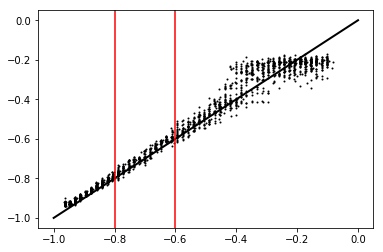

In [63]:
predicted = press_model.predict(test_X)
true_label = test_press_Y

plt.plot([-1, 0], [-1,0], color='black', linestyle='-', linewidth=2)
plt.axvline(x=-0.8, color='red')
plt.axvline(x=-0.6, color='red')
plt.scatter(test_press_Y,predicted,s=1,color='black')
plt.show

In [65]:
result = []

cut_list =[-1,-0.8,-0.6,0]
filepath='D:/AI_data_set/Patch/One_Pad_Model&Data/180118_One_Pad_cate.out'
cate_model.load_weights(filepath) 

number_of_group =2
number_of_label =60

for i in range(0, number_of_group*number_of_label):
    
    start_num = 800*(i)
    end_num = 800*(i+1)
    sep_X = test_X[start_num:end_num]
    sep_Y = test_cate_Y[start_num:end_num]
    sep_press_Y = test_Y[:,0][start_num:end_num]
    real_label = i//number_of_group
    
    df = pd.DataFrame(sep_press_Y)
    sep_press_cate_Y = df.apply(lambda x : pd.cut(x, cut_list,labels=[2,1,0]))
    
    group0_sep_index = np.where(sep_press_cate_Y==0)[0]
    group1_sep_index = np.where(sep_press_cate_Y==1)[0]
    group2_sep_index = np.where(sep_press_cate_Y==2)[0]
    
    group0_sep_X = sep_X[group0_sep_index]
    group0_sep_Y = sep_Y[group0_sep_index]
    group1_sep_X = sep_X[group1_sep_index]
    group1_sep_Y = sep_Y[group1_sep_index]
    group2_sep_X = sep_X[group2_sep_index]
    group2_sep_Y = sep_Y[group2_sep_index]
    
    score, acc_all =  cate_model.evaluate(sep_X, sep_Y, verbose =0)
    score, acc_0 =  cate_model.evaluate(group0_sep_X, group0_sep_Y, verbose =0)
    score, acc_1 =  cate_model.evaluate(group1_sep_X, group1_sep_Y, verbose =0)
    score, acc_2 =  cate_model.evaluate(group2_sep_X, group2_sep_Y, verbose =0)
    
    y_proba = cate_model.predict(sep_X)
    all_y_classes = y_proba.argmax(axis=-1)
    group0_y_classes = all_y_classes[group0_sep_index]
    group1_y_classes = all_y_classes[group1_sep_index]
    group2_y_classes = all_y_classes[group2_sep_index]
    
    counts = np.bincount(all_y_classes)
    all_freq_label = np.argmax(counts)
    all_right = all_freq_label == real_label
    
    counts = np.bincount(group0_y_classes)
    group0_freq_label = np.argmax(counts)
    group0_right = group0_freq_label == real_label
    
    counts = np.bincount(group1_y_classes)
    group1_freq_label = np.argmax(counts)
    group1_right = group1_freq_label == real_label
    
    counts = np.bincount(group2_y_classes)
    group2_freq_label = np.argmax(counts)
    group2_right = group2_freq_label == real_label
    
    
    sep_result = (real_label, i%number_of_group, acc_all, acc_0, acc_1, acc_2, all_freq_label, all_right,\
                  group0_freq_label, group0_right, group1_freq_label, group1_right, group2_freq_label, group2_right)

    result.append(sep_result)
    print(result)
#     print(sep_Y.shape)
    
    if i%number_of_group ==0:
        print(real_label)

test_result = np.array(result)

[(0, 0, 0.63375, 0.37791932059447986, 1.0, 1.0, 59, False, 59, False, 59, False, 59, False)]
0
[(0, 0, 0.63375, 0.37791932059447986, 1.0, 1.0, 59, False, 59, False, 59, False, 59, False), (0, 1, 0.71875, 0.4565217437375571, 1.0, 1.0, 59, False, 59, False, 59, False, 59, False)]


ValueError: not enough values to unpack (expected 2, got 0)

In [36]:
result = []

cut_list =[-1,-0.8,-0.6,0]
filepath='D:/AI_data_set/Patch/One_Pad_Model&Data/180118_One_Pad_cate.out'
cate_model.load_weights(filepath) 

number_of_group =20
number_of_label =60

for i in range(0, number_of_group*number_of_label):
    
    start_num = 800*(i)
    end_num = 800*(i+1)
    sep_X = train_X[start_num:end_num]
    sep_Y = train_cate_Y[start_num:end_num]
    sep_press_Y = train_Y[:,0][start_num:end_num]
    real_label = i//number_of_group
    
    df = pd.DataFrame(sep_press_Y)
    sep_press_cate_Y = df.apply(lambda x : pd.cut(x, cut_list,labels=[2,1,0]))
    
    group0_sep_index = np.where(sep_press_cate_Y==0)[0]
    group1_sep_index = np.where(sep_press_cate_Y==1)[0]
    group2_sep_index = np.where(sep_press_cate_Y==2)[0]
    
    group0_sep_X = sep_X[group0_sep_index]
    group0_sep_Y = sep_Y[group0_sep_index]
    group1_sep_X = sep_X[group1_sep_index]
    group1_sep_Y = sep_Y[group1_sep_index]
    group2_sep_X = sep_X[group2_sep_index]
    group2_sep_Y = sep_Y[group2_sep_index]
    
    score, acc_all =  cate_model.evaluate(sep_X, sep_Y, verbose =0)
    score, acc_0 =  cate_model.evaluate(group0_sep_X, group0_sep_Y, verbose =0)
    score, acc_1 =  cate_model.evaluate(group1_sep_X, group1_sep_Y, verbose =0)
    score, acc_2 =  cate_model.evaluate(group2_sep_X, group2_sep_Y, verbose =0)
    
    y_proba = cate_model.predict(sep_X)
    all_y_classes = y_proba.argmax(axis=-1)
    group0_y_classes = all_y_classes[group0_sep_index]
    group1_y_classes = all_y_classes[group1_sep_index]
    group2_y_classes = all_y_classes[group2_sep_index]
    
    counts = np.bincount(all_y_classes)
    all_freq_label = np.argmax(counts)
    all_right = all_freq_label == real_label
    
    counts = np.bincount(group0_y_classes)
    group0_freq_label = np.argmax(counts)
    group0_right = group0_freq_label == real_label
    
    counts = np.bincount(group1_y_classes)
    group1_freq_label = np.argmax(counts)
    group1_right = group1_freq_label == real_label
    
    counts = np.bincount(group2_y_classes)
    group2_freq_label = np.argmax(counts)
    group2_right = group2_freq_label == real_label
    
    sep_result = (real_label, i%number_of_group, acc_all, acc_0, acc_1, acc_2, all_freq_label, all_right,\
                  group0_freq_label, group0_right, group1_freq_label, group1_right, group2_freq_label, group2_right)

    result.append(sep_result)
    print()
    
    if i%number_of_group ==0:
        print(real_label)

train_result = np.array(result)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [41]:
# df = pd.DataFrame(test_result)
# test_mean = df.groupby([0]).mean()

# df = pd.DataFrame(test_result)
# test_sum = df.groupby([0]).sum()

df = pd.DataFrame(train_result)
train_mean = df.groupby([0]).mean()


df = pd.DataFrame(train_result)
train_sum = df.groupby([0]).sum()


       1         2         3         4         5     6    7     8    9     10  \
0                                                                               
0.0   9.5  0.673250  0.438980  1.000000  1.000000   0.0  1.0   0.0  1.0   0.0   
1.0   9.5  0.624750  0.363407  0.981059  1.000000   1.0  1.0   1.0  1.0   1.0   
2.0   9.5  0.706187  0.488060  1.000000  1.000000   2.0  1.0   2.0  1.0   2.0   
3.0   9.5  0.771188  0.602699  1.000000  1.000000   3.0  1.0   3.0  1.0   3.0   
4.0   9.5  0.773250  0.605184  1.000000  1.000000   4.0  1.0   4.0  1.0   4.0   
5.0   9.5  0.768250  0.606340  1.000000  1.000000   5.0  1.0   5.0  1.0   5.0   
6.0   9.5  0.768000  0.587917  1.000000  1.000000   6.0  1.0   6.0  1.0   6.0   
7.0   9.5  0.735875  0.581479  1.000000  1.000000   7.0  1.0   7.0  1.0   7.0   
8.0   9.5  0.820813  0.694664  1.000000  1.000000   8.0  1.0   8.0  1.0   8.0   
9.0   9.5  0.777062  0.599565  1.000000  1.000000   9.0  1.0   9.0  1.0   9.0   
10.0  9.5  0.690688  0.45231